In [1]:
!pip install pytrends


     ---------------------------------------- 3.8/3.8 MB 5.3 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
from pytrends.request import TrendReq
import time
import numpy as np

# Set up pytrends
pytrends = TrendReq(hl='en-US', tz=360)

# Define your search term
subject = "Natural gas"

# Define the start and end years
start_year = 2010
end_year = 2023

# Initialize an empty DataFrame to store the results
interest_over_time_df = pd.DataFrame()

# Loop through 5-year intervals and retrieve data with rate limiting and retries
for year in range(start_year, end_year, 5):
    print(interest_over_time_df)
    # Define the timeframe for each 5-year interval
    time_frame = f'{year}-01-01 {year + 4}-12-31'

    # Create a payload for the Google Trends API
    pytrends.build_payload(kw_list=[subject],timeframe=time_frame,geo="DE")


    # Initialize retry counter
    retries = 0

    while retries < 3:  # Allow a maximum of 3 retries
        try:
            # Get interest over time data (weekly) for the current interval
            data = pytrends.interest_over_time()
            average=data["Natural gas"].mean()
            data["SVI"]=np.log(data["Natural gas"])-np.log(average)
            
            # Append the data to the result DataFrame
            if interest_over_time_df is None:
                interest_over_time_df = data
            else:
                interest_over_time_df = pd.concat([interest_over_time_df,data],axis=0)
                
            
            # Break out of the retry loop if successful
            break
        except Exception as e:
            # Handle exceptions (e.g., rate limit error)
            print(f"An error occurred: {str(e)}")
            retries += 1
            # Sleep for a while before retrying (backoff and retry strategy)
            time.sleep(60)  # Sleep for 1 minute before retrying
    else:
        # Maximum number of retries reached, exit the loop
        print("Maximum number of retries reached, exiting.")
        break

# Print the resulting DataFrame
print(interest_over_time_df)

Empty DataFrame
Columns: []
Index: []
            Natural gas  isPartial       SVI
date                                        
2010-01-03           88      False  0.946367
2010-01-10           51      False  0.400856
2010-01-17           66      False  0.658685
2010-01-24           54      False  0.458014
2010-01-31           54      False  0.458014
...                 ...        ...       ...
2014-11-30           24      False -0.352916
2014-12-07           35      False  0.024378
2014-12-14           23      False -0.395476
2014-12-21           18      False -0.640598
2014-12-28           14      False -0.891913

[261 rows x 3 columns]
            Natural gas  isPartial       SVI
date                                        
2010-01-03           88      False  0.946367
2010-01-10           51      False  0.400856
2010-01-17           66      False  0.658685
2010-01-24           54      False  0.458014
2010-01-31           54      False  0.458014
...                 ...        ...    

In [60]:
df=pd.read_csv("multiTimeline (2).csv")
string="Natural gas: (Tyskland)"
sf_2=pd.DataFrame()
sf_2["Date"]=df["Måned"].values
sf_2["Value"]=df[string].values
df.iloc[:,[0]]
interest_over_time_df["Date"]=interest_over_time_df.index.tolist()
sf_2['Date'] = pd.to_datetime(sf_2['Date'])
daily_dates = pd.date_range(start=sf_2['Date'].min(), end=interest_over_time_df['Date'].max(), freq='D')
new_df = pd.DataFrame({'Date': daily_dates})

# Merge the DataFrames based on the 'Date' column (outer join to include all dates)
merged_df = new_df.merge(sf_2, on='Date', how='outer')

# Forward-fill the missing values
merged_df['Value'].fillna(method='ffill', inplace=True)

merged_df=merged_df.merge(interest_over_time_df, on="Date", how="inner" )

merged_df["Normalized"]=merged_df["SVI"]*merged_df["Value"]/100

daily_dates = pd.date_range(start=merged_df['Date'].min(), end=merged_df['Date'].max(), freq='D')
new_df = pd.DataFrame({'Date': daily_dates})

# Merge the DataFrames based on the 'Date' column (outer join to include all dates)
merged_df = new_df.merge(merged_df, on='Date', how='outer')

# Forward-fill the missing values
merged_df['Normalized'].fillna(method='ffill', inplace=True)




Google_df=pd.DataFrame()

Google_df["Date"]=merged_df["Date"].values
Google_df["Google_data"]=merged_df["Normalized"].values

print(Google_df)

Google_df.to_csv("Google_data.csv")



           Date  Google_data
0    2010-10-03     0.688538
1    2010-10-04     0.688538
2    2010-10-05     0.688538
3    2010-10-06     0.688538
4    2010-10-07     0.688538
...         ...          ...
4735 2023-09-20    -0.061275
4736 2023-09-21    -0.061275
4737 2023-09-22    -0.061275
4738 2023-09-23    -0.061275
4739 2023-09-24     0.132046

[4740 rows x 2 columns]


C:\Users\Olej0\AppData\Local\Temp\ipykernel_19372\4003884678.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df['Value'].fillna(method='ffill', inplace=True)
C:\Users\Olej0\AppData\Local\Temp\ipykernel_19372\4003884678.py:29: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df['Normalized'].fillna(method='ffill', inplace=True)


            Natural gas  isPartial       SVI       Date
date                                                   
2010-01-03           88      False  0.946367 2010-01-03
2010-01-10           51      False  0.400856 2010-01-10
2010-01-17           66      False  0.658685 2010-01-17
2010-01-24           54      False  0.458014 2010-01-24
2010-01-31           54      False  0.458014 2010-01-31
...                 ...        ...       ...        ...
2023-08-27           36      False  0.076961 2023-08-27
2023-09-03           36      False  0.076961 2023-09-03
2023-09-10           35      False  0.048790 2023-09-10
2023-09-17           29      False -0.139262 2023-09-17
2023-09-24           45      False  0.300105 2023-09-24

[717 rows x 4 columns]


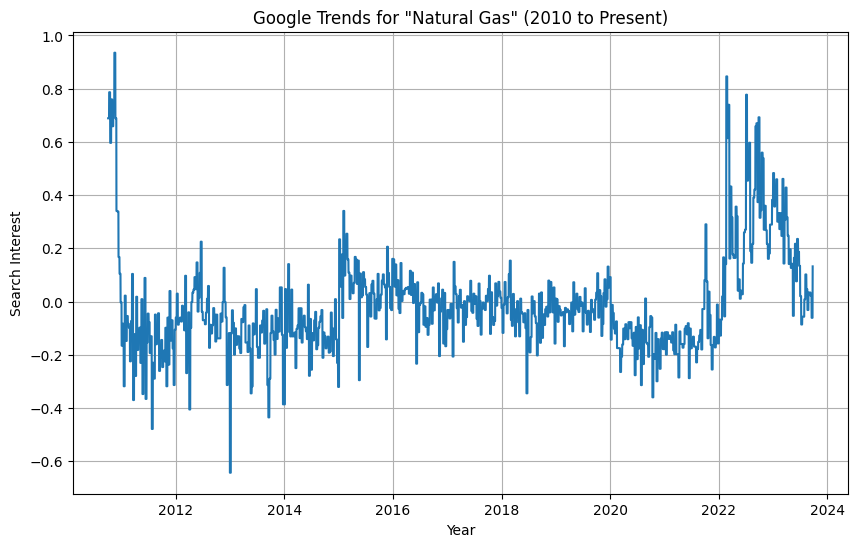

In [59]:
print(interest_over_time_df)
import matplotlib.pyplot as plt

# Assuming you have the interest_over_time_df DataFrame from the previous code
# Plot the Google Trends data
plt.figure(figsize=(10, 6))
plt.plot(Google_df["Date"], Google_df['Google_data'], linestyle='-')
plt.title('Google Trends for "Natural Gas" (2010 to Present)')
plt.xlabel('Year')
plt.ylabel('Search Interest')
plt.grid(True)
plt.show()